In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math


# Problem 1

In [11]:
stuff=np.load('/Users/junalexsugiyama/Desktop/PHYS512/repo/phys512-2022/problem_sets/mcmc/sidebands.npz')
t=stuff['time']
d=stuff['signal']

## a)

a =  0.8074251575771672 
 t0 =  0.00020357019622709648 
 w =  -2096944.0164913516 



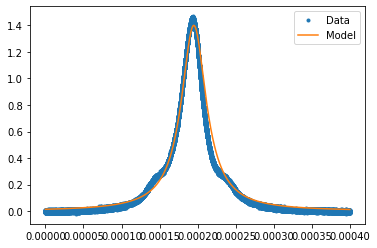

In [74]:
def calc_lorentz(p,t):
    a = p[0]
    t0 =p[1]
    w = p[2]
    y = a/(1 + (t - t0)**2/w**2)
    #y=p[0]/(p[1]+(t-p[2])**2)
    grad=np.zeros([t.size,p.size])
    #now differentiate w.r.t. all the parameters
    grad[:,0]=1.0/(1 + (t - t0)**2/w**2) 
    grad[:,1]=-2*a*(t-t0)/((1+(t - t0)**2/w**2 ) * w**2 )
    grad[:,2]=2*a*w*(t-t0)**2/(w**3 * ( 1+ (t-t0)**2)/w**2)
    return y,grad


x_true,grad=calc_lorentz(p_true,t)

plt.ion()
plt.clf()

plt.plot(t,d,'.', label = 'Data')

p0=np.array([1.4,0.000195,0.00002]) #starting guess, close but not exact


p=p0.copy()
for j in range(10):
    pred,grad=calc_lorentz(p0,t)
    r=d-pred
    err=(r**2).sum()
    r=np.matrix(r).transpose()
    grad=np.matrix(grad)

    lhs=grad.transpose()*grad
    rhs=grad.transpose()*r
    dp=np.linalg.inv(lhs)*(rhs)
    for jj in range(p.size):
        p[jj]=p[jj]+dp[jj]

plt.plot(t,pred, label = 'Model')
plt.legend()
print('a = ', p[0], '\n',
      't0 = ', p[1], '\n',
    'w = ', p[2], '\n')



## b)

In [49]:
print(np.sqrt(np.sum((d - pred)**2) / len(pred)))

0.05295366891412235


## c)

In [72]:
def lorentz(p, t):
    a = p[0]
    t0 =p[1]
    w = p[2]
    y = a/(1 + (t - t0)**2/w**2)
    return y

def func(p, t):
    logdx=np.linspace(-5,-4,len(t) )
    print(t)
    dx=10**logdx
    print(dx)
    params = np.array(p.copy())
    grad=np.zeros([t.size,p.size])
    for i in range(len(p)):
        x0=p[i]

        params[i] = [x0 + dx]
        y1=lorentz(params, t)
        params[i] = [x0 - dx]
        
        ym=lorentz(params, t)
        d2=(y1-ym)/(2*dx)
           
        grad[:,i]= d2
    pred = lorentz(p, t)
    return pred, grad

p0=np.array([1.4,0.000195,0.00002])
for j in range(10):
    pred,grad=func(p0,t)
    print(grad)
    r=d-pred
    err=(r**2).sum()
    r=np.matrix(r).transpose()
    grad=np.matrix(grad)

    lhs=grad.transpose()*grad
    rhs=grad.transpose()*r
    dp=np.linalg.inv(lhs)*(rhs)
    for jj in range(p.size):
        p[jj]=p[jj]+dp[jj]

plt.plot(t,pred, label = 'Model')

[0.00000e+00 4.00000e-09 8.00000e-09 ... 3.99988e-04 3.99992e-04
 3.99996e-04]
[1.00000000e-05 1.00002303e-05 1.00004605e-05 ... 9.99953949e-05
 9.99976974e-05 1.00000000e-04]


ValueError: setting an array element with a sequence.